In [4]:
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


### b) How would you insert this entire dataset into a MongoDB collection named flights? Describe the structure of each document

In [29]:
flight_df = pd.read_csv('Flights_Delay.csv')

client = pymongo.MongoClient('localhost:27017')
db = client['flight_db']

# replace delays with mean
mean_num = flight_df['ARRIVAL_DELAY'].mean()
flight_df['ARRIVAL_DELAY'] = flight_df['ARRIVAL_DELAY'].fillna(mean_num)

mean_num = flight_df['DEPARTURE_DELAY'].mean()
flight_df['DEPARTURE_DELAY'] = flight_df['DEPARTURE_DELAY'].fillna(mean_num)

mean_num = flight_df['AIR_TIME'].mean()
flight_df['AIR_TIME'] = flight_df['AIR_TIME'].fillna(mean_num)

# set arrival time and departure time to 0, if null
flight_df['DEPARTURE_TIME'] = flight_df['DEPARTURE_TIME'].fillna(0)
flight_df['ARRIVAL_TIME'] = flight_df['ARRIVAL_TIME'].fillna(0)

# departure time  and arrival time string to int
flight_df['DEPARTURE_TIME'] = flight_df['DEPARTURE_TIME'].astype('int')
flight_df['DEPARTURE_TIME'] = flight_df['DEPARTURE_TIME'].apply(lambda x : x //100 )

flight_df['ARRIVAL_TIME'] = flight_df['ARRIVAL_TIME'].astype('int')
flight_df['ARRIVAL_TIME'] = flight_df['ARRIVAL_TIME'].apply(lambda x : x //100 )

In [30]:
collection_name = 'flights'

flight_docs = flight_df.to_dict('records')

if collection_name in db.list_collection_names():
    db[collection_name].drop()

collection = db[collection_name]

if flight_docs:
    collection.insert_many(flight_docs)

In [189]:
dummy_document = {
    "ID": 1,
    "YEAR": 2015,
    "MONTH": 1,
    "DAY": 1,
    "DAY_OF_WEEK": 1,
    "AIRLINE": "XYZ",
    "FLIGHT_NUMBER": "1234",
    "TAIL_NUMBER": "N12345",
    "ORIGIN_AIRPORT": "JFK",
    "DESTINATION_AIRPORT": "LAX",
    "SCHEDULED_DEPARTURE": "1230",
    "DEPARTURE_TIME": "1245",
    "DEPARTURE_DELAY": 15,
    "TAXI_OUT": 10,
    "WHEELS_OFF": "1255",
    "SCHEDULED_TIME": "1500",
    "ELAPSED_TIME": 180,
    "AIR_TIME": 165,
    "DISTANCE": 2455,
    "WHEELS_ON": "1505",
    "TAXI_IN": 10,
    "SCHEDULED_ARRIVAL": "1530",
    "ARRIVAL_TIME": "1520",
    "ARRIVAL_DELAY": -10,
    "DIVERTED": 0,
    "CANCELLED": 0
}

collection.insert_one(dummy_document)


InsertOneResult(ObjectId('66d4807f827a4daa7137e2f6'), acknowledged=True)

### d) Write a MongoDB query to find all flights that were delayed by more than 60 minutes.

In [41]:
query = {
    '$or': [
        { 'DEPARTURE_DELAY': { '$gt': 60 } },
        { 'ARRIVAL_DELAY': { '$gt': 60 } }
    ]
}

delayed_flights = collection.find(query).limit(5)

list(delayed_flights)

[{'_id': ObjectId('66d585193a3a8a50a8218b52'),
  'ID': 2,
  'YEAR': 2015,
  'MONTH': 1,
  'DAY': 27,
  'DAY_OF_WEEK': 2,
  'AIRLINE': 'B6',
  'FLIGHT_NUMBER': 716,
  'TAIL_NUMBER': 'N309JB',
  'ORIGIN_AIRPORT': 'JAX',
  'DESTINATION_AIRPORT': 'DCA',
  'SCHEDULED_DEPARTURE': 1335,
  'DEPARTURE_TIME': 15,
  'DEPARTURE_DELAY': 90.0,
  'TAXI_OUT': 16.0,
  'WHEELS_OFF': 1521.0,
  'SCHEDULED_TIME': 104,
  'ELAPSED_TIME': 110.0,
  'AIR_TIME': 91.0,
  'DISTANCE': 634,
  'WHEELS_ON': 1652.0,
  'TAXI_IN': 3.0,
  'SCHEDULED_ARRIVAL': 1519,
  'ARRIVAL_TIME': 16,
  'ARRIVAL_DELAY': 96.0,
  'DIVERTED': 0,
  'CANCELLED': 0,
  'CANCELLATION_REASON': nan,
  'AIR_SYSTEM_DELAY': 6.0,
  'SECURITY_DELAY': 0.0,
  'AIRLINE_DELAY': 90.0,
  'LATE_AIRCRAFT_DELAY': 0.0,
  'WEATHER_DELAY': 0.0},
 {'_id': ObjectId('66d585193a3a8a50a8218b62'),
  'ID': 18,
  'YEAR': 2015,
  'MONTH': 2,
  'DAY': 24,
  'DAY_OF_WEEK': 2,
  'AIRLINE': 'OO',
  'FLIGHT_NUMBER': 6196,
  'TAIL_NUMBER': 'N751SK',
  'ORIGIN_AIRPORT': 'ONT',
 

### e) How would you query all flights that were cancelled (CANCELLED flag set to 1) and return only the AIRLINE, ORIGIN_AIRPORT, and CANCELLATION_REASON fields?
?e

In [42]:

cancelled_flights = collection.find({ 'CANCELLED': 1 },  { 'AIRLINE': 1, 'ORIGIN_AIRPORT': 1, 'CANCELLATION_REASON': 1, '_id': 0 }).limit(10)
list(cancelled_flights)

[{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'MLI', 'CANCELLATION_REASON': 'C'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'BWI', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'DL', 'ORIGIN_AIRPORT': 'SFO', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'DFW', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'BDL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'MKE', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'DCA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'FLL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'ORF', 'CANCELLATION_REASON': 'B'}]

### f) Using MongoDB’s aggregation framework, how would you calculate the average arrival delay (ARRIVAL_DELAY) for each airline? [Create a suitable plot using matplotlib/seaborn]
r

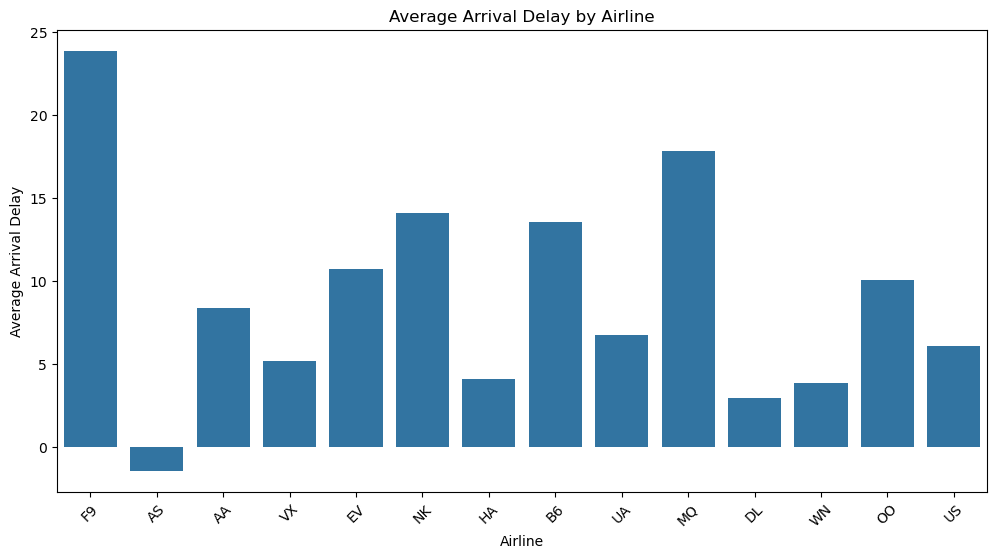

In [23]:
pipeline = [
    {'$group': {'_id':'$AIRLINE', 'avgDelay': {'$avg':'$ARRIVAL_DELAY'}}},
    {'$project': {'AIRLINE':1,'avgDelay' :{'$round': ['$avgDelay',2]}}}
]

result = collection.aggregate(pipeline)

data = list(result)
airlines = [item['_id'] for item in data]
avg_delays = [item['avgDelay'] for item in data]

plt.figure(figsize=(12, 6))
sns.barplot(x=airlines, y=avg_delays)
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Airline')
plt.xticks(rotation=45)
plt.show()


- F9 has the highest arrival delay, followed by MQ
- AS has average early arrival
- 

### g) Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]
or

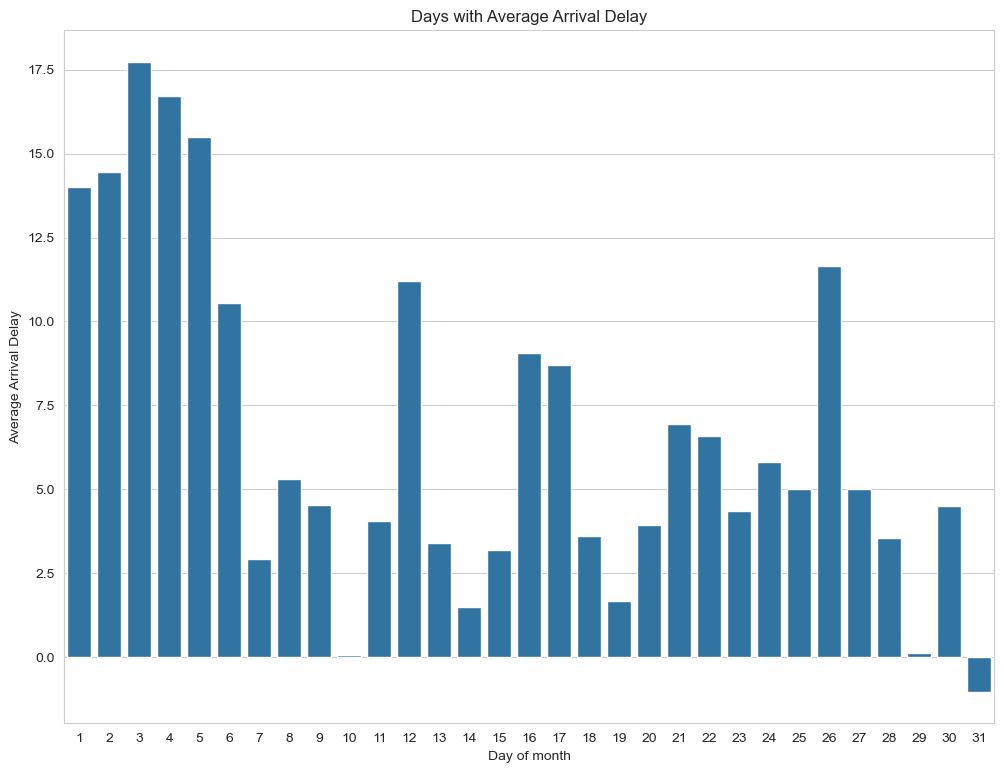

In [32]:

pipeline2 = [
    {'$group': {'_id':'$DAY', 'avgDelay': {'$avg':'$ARRIVAL_DELAY'}}},
    {'$project': {'_id' :0,'DAY':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'_id':1}}
]

result = collection.aggregate(pipeline2)

day_df = pd.DataFrame(list(result))

plt.figure(figsize=(12, 9))
sns.set_style('whitegrid')
sns.barplot(data=day_df, x='DAY', y='avgDelay')
plt.xlabel('Day of month')
plt.ylabel('Average Arrival Delay')
plt.title('Days with Average Arrival Delay')

plt.show()


### h) Write a MongoDB aggregation pipeline to find the top 10 airports with the highest average total delay (DEPARTURE_DELAY + ARRIVAL_DELAY).
.

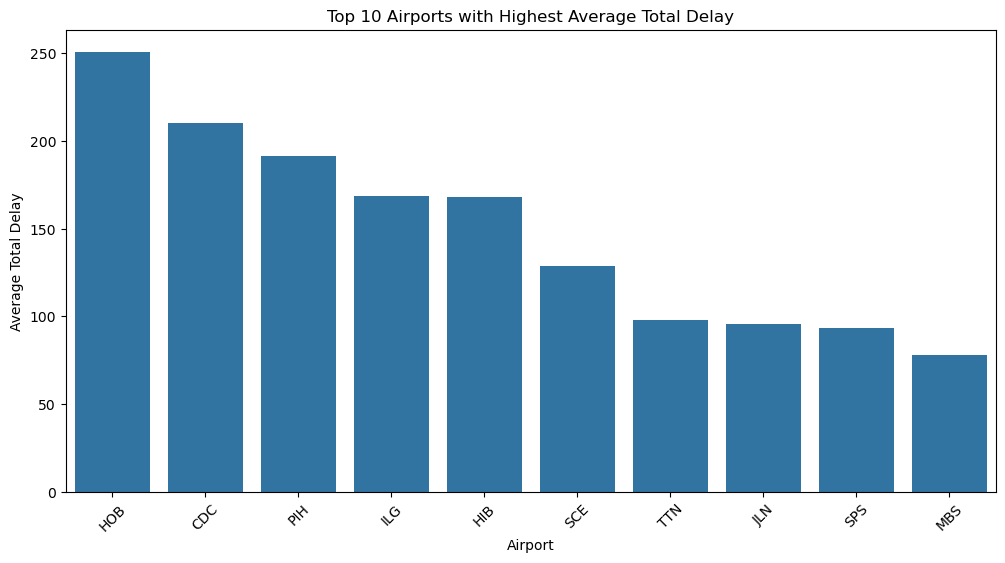

In [194]:
pipeline = [
    {"$project": {"ORIGIN_AIRPORT": 1, "TOTAL_DELAY": {"$add": ["$DEPARTURE_DELAY", "$ARRIVAL_DELAY"]}}},
    {"$group": {"_id": "$ORIGIN_AIRPORT", "avg_total_delay": {"$avg": "$TOTAL_DELAY"}}},
    {"$sort": {"avg_total_delay": -1}},
    {"$limit": 10}
]

result = collection.aggregate(pipeline)

data = list(result)
airports = [item['_id'] for item in data]
avg_delays = [item['avg_total_delay'] for item in data]

plt.figure(figsize=(12, 6))
sns.barplot(x=airports, y=avg_delays)
plt.xlabel('Airport')
plt.ylabel('Average Total Delay')
plt.title('Top 10 Airports with Highest Average Total Delay')
plt.xticks(rotation=45)
plt.show()


### i) Explain how you would create an index on the ORIGIN_AIRPORT and DESTINATION_AIRPORT fields to optimize queries filtering by these fields.
ds

In [195]:
collection.create_index([("ORIGIN_AIRPORT", pymongo.ASCENDING), ("DESTINATION_AIRPORT", pymongo.ASCENDING)])


'ORIGIN_AIRPORT_1_DESTINATION_AIRPORT_1'

### j) Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]
rn

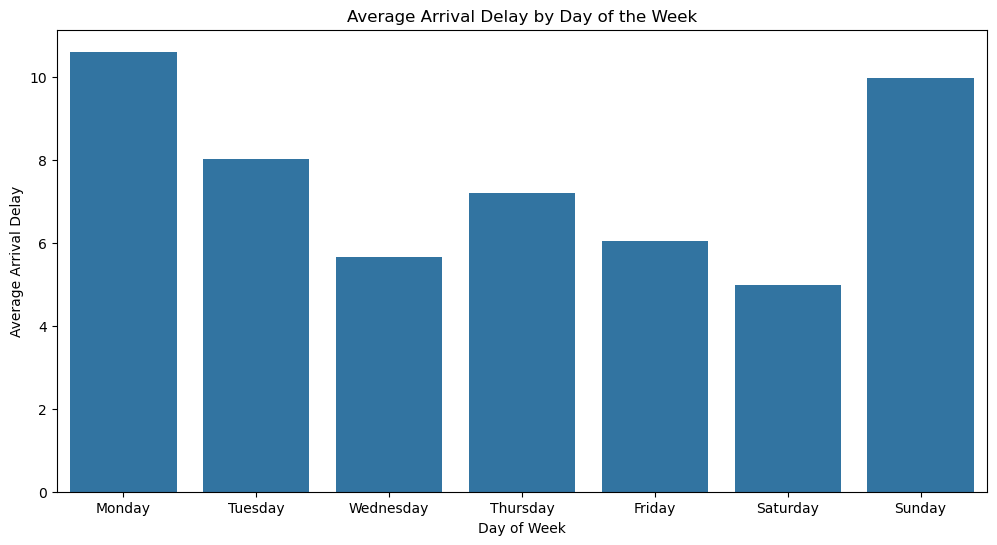

In [196]:
pipeline = [
    {"$group": {"_id": "$DAY_OF_WEEK", "avg_arrival_delay": {"$avg": "$ARRIVAL_DELAY"}}},
    {"$sort": {"_id": 1}}
]

result = collection.aggregate(pipeline)

data = list(result)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_delays = [item['avg_arrival_delay'] for item in data]

plt.figure(figsize=(12, 6))
sns.barplot(x=days, y=avg_delays)
plt.xlabel('Day of Week')
plt.ylabel('Average Arrival Delay')
plt.title('Average Arrival Delay by Day of the Week')
plt.show()

### k) Arrange Days of month as per cancellations done in descending order. [Create a suitable plot using matplotlib/seaborn]
n]

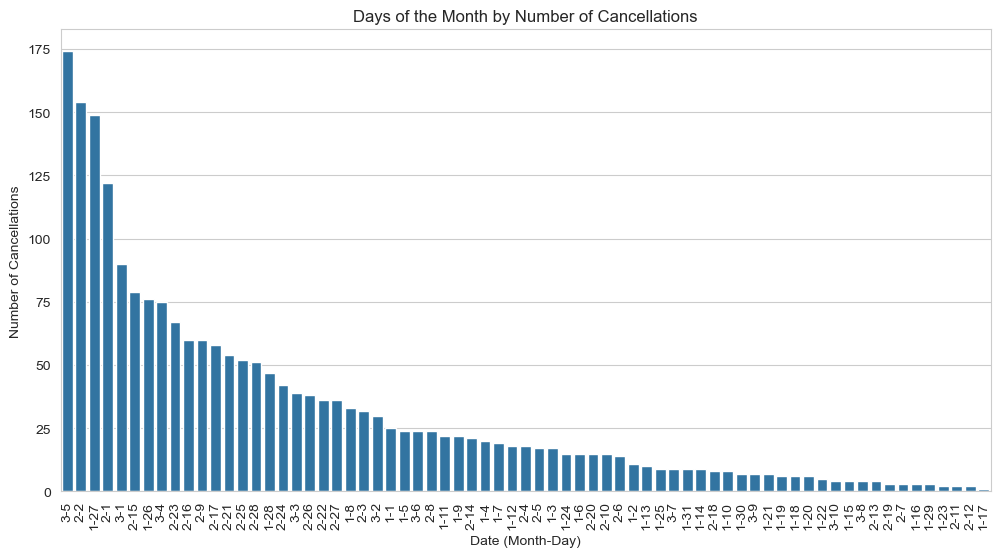

In [48]:
pipeline = [
    {"$group": {"_id": {"MONTH": "$MONTH", "DAY": "$DAY"}, "total_cancellations": {"$sum": "$CANCELLED"}}},
    {"$sort": {"total_cancellations": -1}}
]

result = collection.aggregate(pipeline)

data = list(result)
days = [f'{item["_id"]["MONTH"]}-{item["_id"]["DAY"]}' for item in data]
cancellations = [item['total_cancellations'] for item in data]

plt.figure(figsize=(12, 6))
sns.barplot(x=days, y=cancellations)
plt.xlabel('Date (Month-Day)')
plt.ylabel('Number of Cancellations')
plt.title('Days of the Month by Number of Cancellations')
plt.xticks(rotation=90)
plt.show()


### l) Find the busiest airports with respect to day of week. Represent it by using a suitable plot.
ot

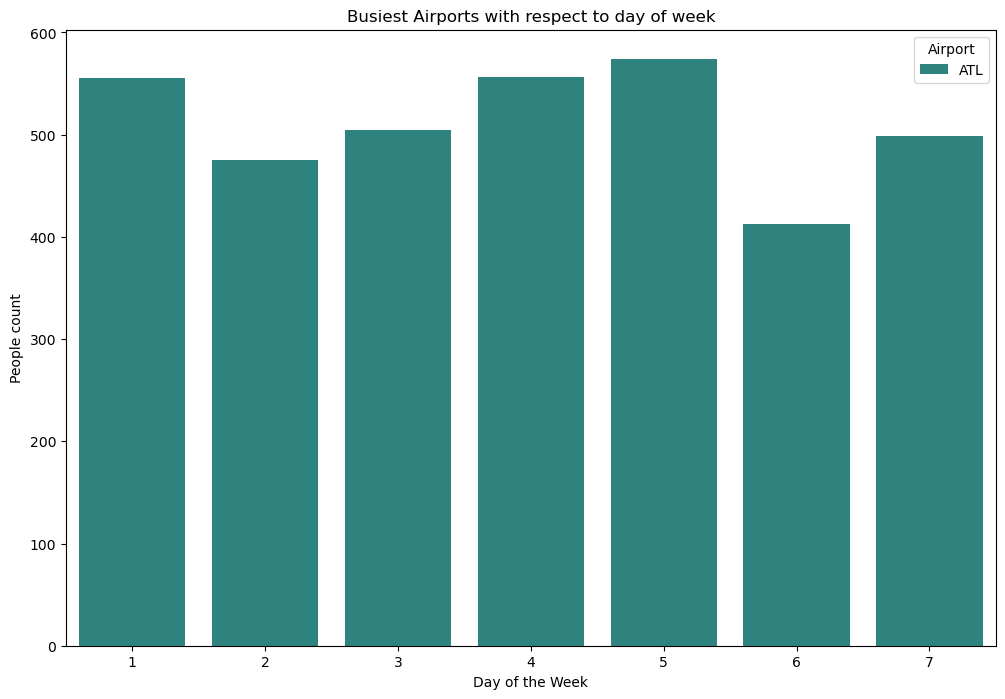

In [198]:
pipeline = [
    {'$group': {'_id': {'AIRPORT': '$ORIGIN_AIRPORT', 'DAY_OF_WEEK': '$DAY_OF_WEEK'},'count': {'$sum': 1}}},
    {'$project': {'_id': 0,'AIRPORT': '$_id.AIRPORT','DAY_OF_WEEK': '$_id.DAY_OF_WEEK','count': 1}},
    {'$sort': {'DAY_OF_WEEK': 1,'count': -1}},
    {'$group': {'_id': '$DAY_OF_WEEK','AIRPORT': {'$first': '$AIRPORT'},'COUNT': {'$first': '$count'}}},
    {'$project': {'_id': 0,'DAY_OF_WEEK': '$_id','AIRPORT': 1,'COUNT': 1}}
]

result = collection.aggregate(pipeline)

buzy_airport_df = pd.DataFrame(result)

plt.figure(figsize=(12, 8))
sns.barplot(data=buzy_airport_df, x='DAY_OF_WEEK', y='COUNT', hue='AIRPORT', palette='viridis')
plt.title('Busiest Airports with respect to day of week')
plt.xlabel('Day of the Week')
plt.ylabel('People count')
plt.legend(title='Airport')
plt.show()


### m) Find top 10 Airlines of US. Represent it by using a suitable plot.
.

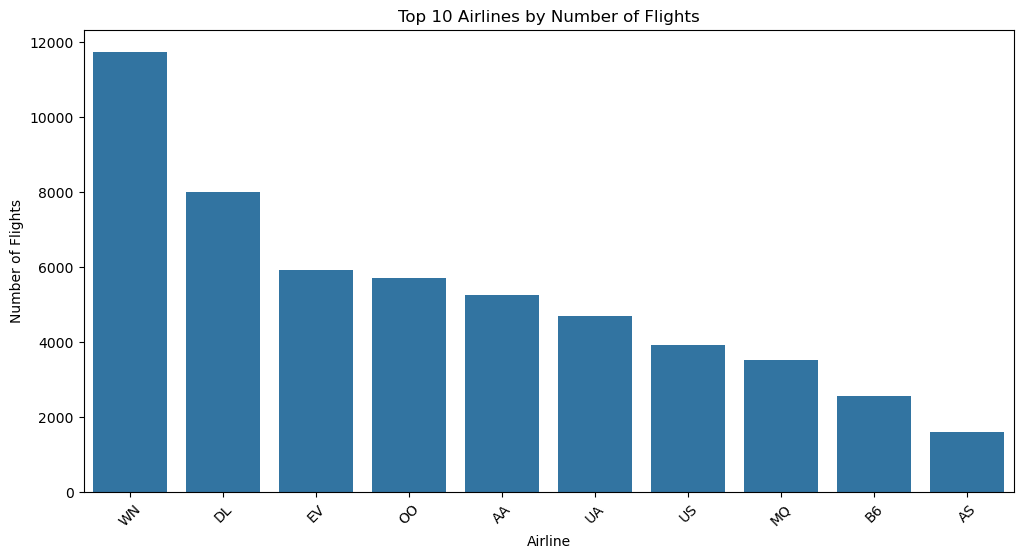

In [199]:
pipeline = [
    {"$group": {"_id": "$AIRLINE", "total_flights": {"$sum": 1}}},
    {"$sort": {"total_flights": -1}},
    {"$limit": 10}
]

result = collection.aggregate(pipeline)

data = list(result)
airlines = [item['_id'] for item in data]
counts = [item['total_flights'] for item in data]

plt.figure(figsize=(12, 6))
sns.barplot(x=airlines, y=counts)
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Top 10 Airlines by Number of Flights')
plt.xticks(rotation=45)
plt.show()


### n) Finding airlines that make the maximum, minimum number of cancellations.
.

In [200]:
pipeline = [
    {"$group": {"_id": "$AIRLINE", "total_cancellations": {"$sum": "$CANCELLED"}}},
    {"$sort": {"total_cancellations": -1}}
]

result = collection.aggregate(pipeline)

data = list(result)
max_cancellations = data[0]
min_cancellations = data[-1]

print("Airline with maximum cancellations:", max_cancellations)
print("Airline with minimum cancellations:", min_cancellations)


Airline with maximum cancellations: {'_id': 'MQ', 'total_cancellations': 414}
Airline with minimum cancellations: {'_id': 'XYZ', 'total_cancellations': 0}


### o) Find and show airline names in descending order that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]
rn

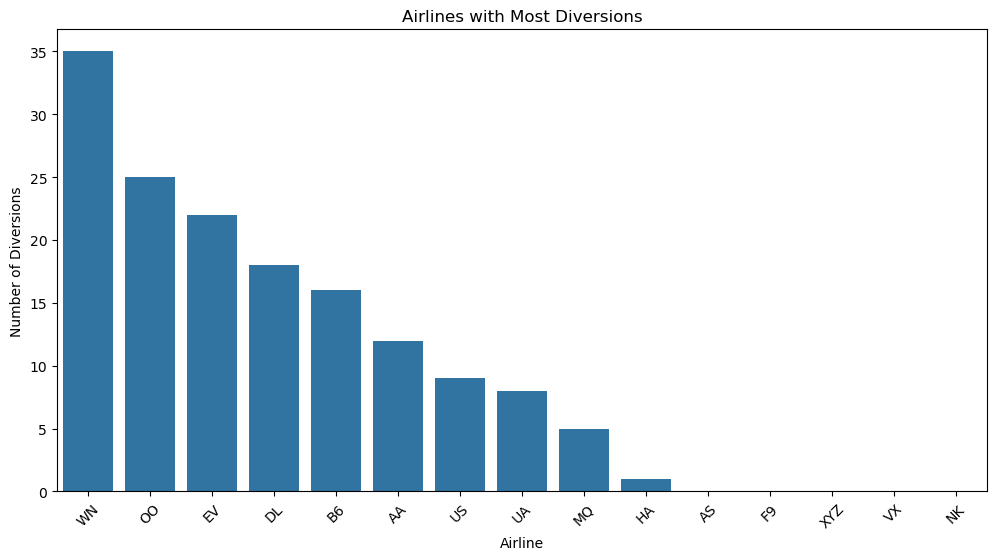

In [201]:
pipeline = [
    {"$group": {"_id": "$AIRLINE", "total_diversions": {"$sum": "$DIVERTED"}}},
    {"$sort": {"total_diversions": -1}}
]

result = collection.aggregate(pipeline)

data = list(result)
airlines = [item['_id'] for item in data]
diversions = [item['total_diversions'] for item in data]

plt.figure(figsize=(12, 6))
sns.barplot(x=airlines, y=diversions)
plt.xlabel('Airline')
plt.ylabel('Number of Diversions')
plt.title('Airlines with Most Diversions')
plt.xticks(rotation=45)
plt.show()


### p) Finding days of month that see the most number of diversions and delays.
.

In [43]:
pipeline = [
    {'$group': {'_id': '$DAY','total_diversions': { '$sum': '$DIVERTED' },
                'total_delays': { '$sum': { '$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}}},
    {'$project': {'_id': 0,'DAY': '$_id','total_diversions': 1,'total_delays': 1}},
    {'$sort': {'total_diversions': -1,'total_delays': -1}},
    {"$limit": 10}
]

result = collection.aggregate(pipeline)

data = list(result)
data

[{'total_diversions': 15, 'total_delays': 83444.06075661737, 'DAY': 2},
 {'total_diversions': 13, 'total_delays': 69743.05544624574, 'DAY': 1},
 {'total_diversions': 12, 'total_delays': 93482.38226739684, 'DAY': 4},
 {'total_diversions': 11, 'total_delays': 87888.04081527858, 'DAY': 5},
 {'total_diversions': 9, 'total_delays': 36363.75671576428, 'DAY': 9},
 {'total_diversions': 8, 'total_delays': 11124.27104460393, 'DAY': 14},
 {'total_diversions': 7, 'total_delays': 66690.84021543432, 'DAY': 6},
 {'total_diversions': 6, 'total_delays': 25587.409222091712, 'DAY': 7},
 {'total_diversions': 6, 'total_delays': 20852.61663387372, 'DAY': 23},
 {'total_diversions': 5, 'total_delays': 89013.04215267168, 'DAY': 3}]

### q) Write a MongoDB query to find the flights with the shortest and longest AIR_TIME. Return the flightNumber, airline, and AIR_TIME.
ME

In [203]:
shortest = collection.find_one({"AIR_TIME": {"$gte": 0}}, sort=[("AIR_TIME", 1)], projection={"_id": 0, "FLIGHT_NUMBER": 1, "AIRLINE": 1, "AIR_TIME": 1})
longest = collection.find_one(sort=[("AIR_TIME", -1)], projection={"_id": 0, "FLIGHT_NUMBER": 1, "AIRLINE": 1, "AIR_TIME": 1})

print("Shortest AIR_TIME:", shortest)
print("Longest AIR_TIME:", longest)


Shortest AIR_TIME: {'AIRLINE': 'AS', 'FLIGHT_NUMBER': 65, 'AIR_TIME': 9.0}
Longest AIR_TIME: {'AIRLINE': 'UA', 'FLIGHT_NUMBER': 15, 'AIR_TIME': 654.0}


### r) Finding all diverted routes from a source to destination airport & which route is the most diverted route.
te

In [44]:
pipeline = [
    {"$group": {"_id": {"ORIGIN_AIRPORT": "$ORIGIN_AIRPORT", "DESTINATION_AIRPORT": "$DESTINATION_AIRPORT"}, "total_diverted": {"$sum": "$DIVERTED"}}},
    {"$sort": {"total_diverted": -1}},
    {"$limit": 10}
]

result = collection.aggregate(pipeline)

data = list(result)
data

[{'_id': {'ORIGIN_AIRPORT': 'CLT', 'DESTINATION_AIRPORT': 'IAH'},
  'total_diverted': 2},
 {'_id': {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT': 'SEA'},
  'total_diverted': 2},
 {'_id': {'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT': 'LGA'},
  'total_diverted': 2},
 {'_id': {'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'ASE'},
  'total_diverted': 2},
 {'_id': {'ORIGIN_AIRPORT': 'JFK', 'DESTINATION_AIRPORT': 'EGE'},
  'total_diverted': 2},
 {'_id': {'ORIGIN_AIRPORT': 'PHL', 'DESTINATION_AIRPORT': 'SAN'},
  'total_diverted': 2},
 {'_id': {'ORIGIN_AIRPORT': 'STT', 'DESTINATION_AIRPORT': 'PHL'},
  'total_diverted': 2},
 {'_id': {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT': 'ASE'},
  'total_diverted': 2},
 {'_id': {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT': 'DAL'},
  'total_diverted': 2},
 {'_id': {'ORIGIN_AIRPORT': 'EWR', 'DESTINATION_AIRPORT': 'BNA'},
  'total_diverted': 1}]

- 9 Routes have diverted 2 flights each

### s) Write a MongoDB aggregation pipeline to calculate all aggregated values for departure delay (DEPARTURE_DELAY) and arrival delay (ARRIVAL_DELAY) for each airline, excluding flights that were either cancelled or diverted.
rte

In [45]:
pipeline = [
    {"$match": {"CANCELLED": 0, "DIVERTED": 0}},
    {"$group": {"_id": "$AIRLINE", "avg_departure_delay": {"$avg": "$DEPARTURE_DELAY"}, "avg_arrival_delay": {"$avg": "$ARRIVAL_DELAY"}}},
    {"$limit": 10}
]

result = collection.aggregate(pipeline)

data = list(result)
data


[{'_id': 'F9',
  'avg_departure_delay': 23.514687100893997,
  'avg_arrival_delay': 24.103448275862068},
 {'_id': 'AS',
  'avg_departure_delay': 2.312579415501906,
  'avg_arrival_delay': -1.531766200762389},
 {'_id': 'AA',
  'avg_departure_delay': 11.414848909345608,
  'avg_arrival_delay': 8.386631979187513},
 {'_id': 'VX',
  'avg_departure_delay': 9.857142857142858,
  'avg_arrival_delay': 5.128571428571429},
 {'_id': 'EV',
  'avg_departure_delay': 11.424399856682193,
  'avg_arrival_delay': 10.884270870655678},
 {'_id': 'NK',
  'avg_departure_delay': 15.527750730282376,
  'avg_arrival_delay': 14.206426484907498},
 {'_id': 'HA',
  'avg_departure_delay': 1.190807799442897,
  'avg_arrival_delay': 4.072423398328691},
 {'_id': 'B6',
  'avg_departure_delay': 15.888144113950565,
  'avg_arrival_delay': 13.95852534562212},
 {'_id': 'UA',
  'avg_departure_delay': 14.167578210457231,
  'avg_arrival_delay': 6.697221614526362},
 {'_id': 'MQ',
  'avg_departure_delay': 16.762568926370417,
  'avg_arriv

### t) Write a MongoDB query to find all flights that were delayed due to WEATHER_DELAY but were not cancelled or diverted. Include the flightNumber, airline, originAirport, and destinationAirport in the results.
ult

In [46]:
result = collection.find({"WEATHER_DELAY": {"$exists": True, "$ne": 0}, "CANCELLED": 0, "DIVERTED": 0},
                         {"_id": 0, "FLIGHT_NUMBER": 1, "AIRLINE": 1, "ORIGIN_AIRPORT": 1, "DESTINATION_AIRPORT": 1}).limit(10)

for flight in result:
    print(flight)


{'AIRLINE': 'EV', 'FLIGHT_NUMBER': 4289, 'ORIGIN_AIRPORT': 'COS', 'DESTINATION_AIRPORT': 'IAH'}
{'AIRLINE': 'EV', 'FLIGHT_NUMBER': 5584, 'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT': 'AVL'}
{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 712, 'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT': 'SFO'}
{'AIRLINE': 'OO', 'FLIGHT_NUMBER': 5166, 'ORIGIN_AIRPORT': 'HDN', 'DESTINATION_AIRPORT': 'DEN'}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 1571, 'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT': 'CAK'}
{'AIRLINE': 'WN', 'FLIGHT_NUMBER': 518, 'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT': 'MEM'}
{'AIRLINE': 'WN', 'FLIGHT_NUMBER': 336, 'ORIGIN_AIRPORT': 'DAL', 'DESTINATION_AIRPORT': 'MAF'}
{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 321, 'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT': 'EWR'}
{'AIRLINE': 'F9', 'FLIGHT_NUMBER': 1343, 'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT': 'CLE'}
{'AIRLINE': 'WN', 'FLIGHT_NUMBER': 2685, 'ORIGIN_AIRPORT': 'LAS', 'DESTINATION_AIRPORT': 'SJC'}


### u) Write a MongoDB query to find all flights that were delayed both at departure (DEPARTURE_DELAY) and arrival (ARRIVAL_DELAY). Return the count of such Flights which are delayed.d

In [47]:
pipeline = [
    {'$match': {'$and': [{'DEPARTURE_DELAY': {'$gt' : 0.0}},{'ARRIVAL_DELAY': {'$gt' : 0.0}}]}},
    {'$group': {'_id':None,'COUNT':{'$sum':1}}},
    {'$project': {'_id': 0,'FLIGHT_NUMBER':1,'COUNT':1}},
    {"$limit": 10}
]

result = collection.aggregate(pipeline)

print("Number of flights delayed at both departure and arrival:", list(result)[0]['COUNT'])


Number of flights delayed at both departure and arrival: 18697


### v) Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined time intervals (e.g., every hour) throughout the day. Generate a Suitable Plot.t

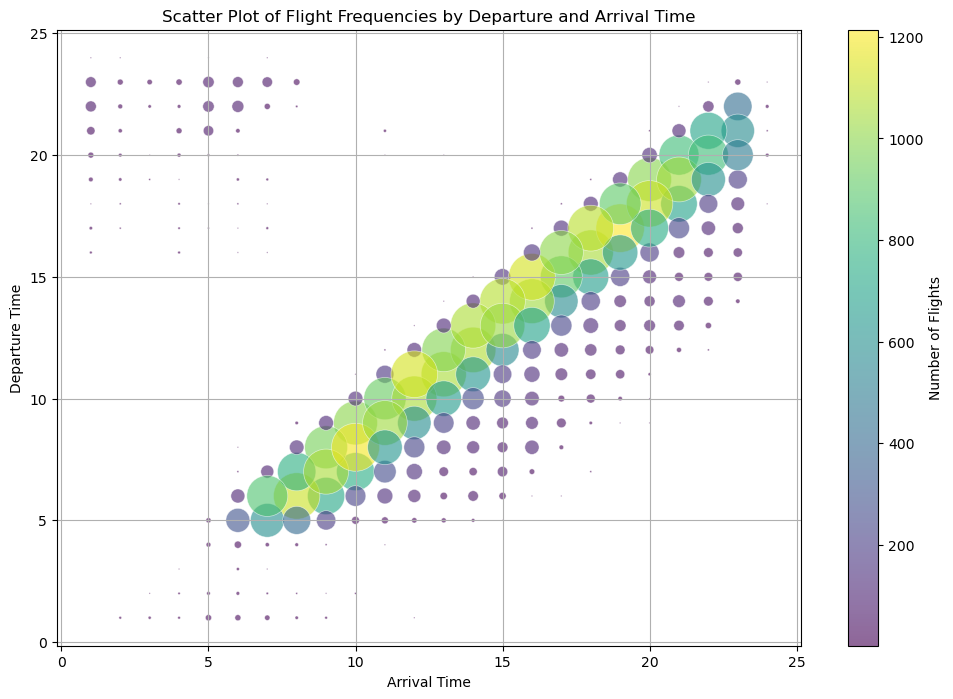

In [22]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    x=flight_freq_df['ARRIVAL_TIME'], 
    y=flight_freq_df['DEPARTURE_TIME'],
    s=flight_freq_df['COUNT'],    
    c=flight_freq_df['COUNT'],    
    cmap='viridis',              
    alpha=0.6,                    
    edgecolor='w',              
    linewidth=0.5             
)

plt.colorbar(scatter, label='Number of Flights') 
plt.title('Scatter Plot of Flight Frequencies by Departure and Arrival Time')
plt.xlabel('Arrival Time')
plt.ylabel('Departure Time')

plt.grid(True)
plt.show()

### w) Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined week of day. Generate a Suitable Plot.
ot

   total_takeoffs  total_landings  DAY_OF_WEEK
0            7888            7888            1
1            7303            7303            2
2            7346            7346            3
3            7923            7923            4
4            7232            7232            7


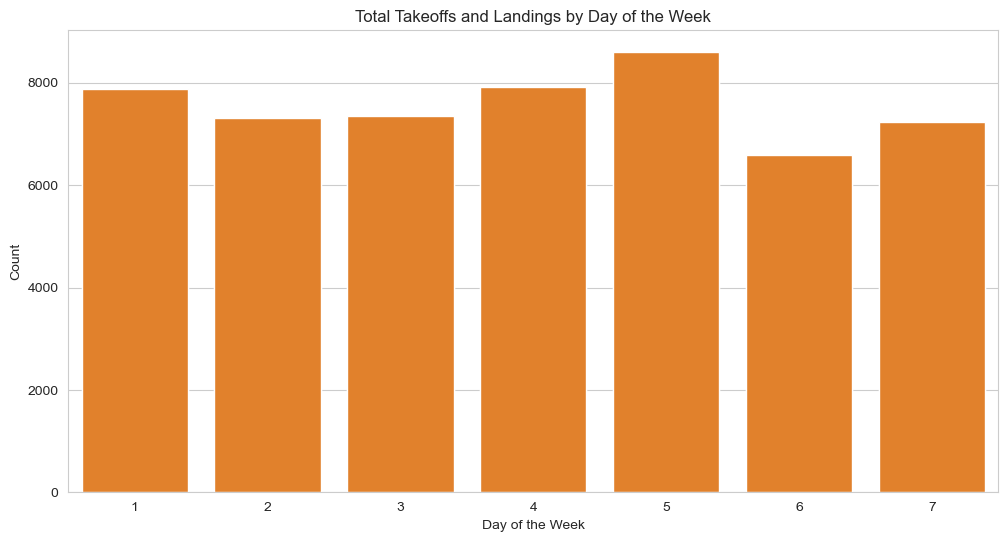

In [50]:
week_day_freq = collection.aggregate([
{'$match': {'DEPARTURE_TIME': {'$gt': 0},'ARRIVAL_TIME': {'$gt': 0}}},
{'$group': {'_id': '$DAY_OF_WEEK','total_takeoffs': {'$sum': 1},'total_landings': {'$sum': 1}}},
{'$project': {'_id': 0,'DAY_OF_WEEK': '$_id','total_takeoffs': 1,'total_landings': 1}}
])

week_day_df = pd.DataFrame(week_day_freq)
print(week_day_df.head())

plt.figure(figsize=(12, 6))
sns.barplot(data=week_day_df, x='DAY_OF_WEEK', y='total_takeoffs')
sns.barplot(data=week_day_df, x='DAY_OF_WEEK', y='total_landings')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Total Takeoffs and Landings by Day of the Week')

plt.show()

### x) Write a MongoDB query to find all flights that departed between 6 AM and 12 PM (noon) local time, regardless of the date. Return the flightNumber, airline, and departureTime. Generate a Bar Plot using Time (x-axis) and Frequency (y-axis).
s).

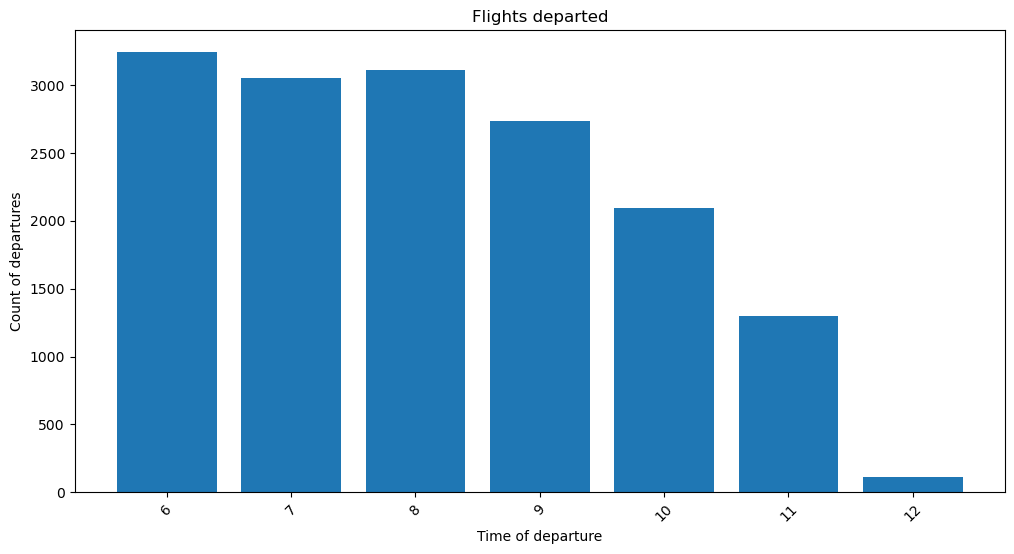

In [210]:
flight_time = flights.aggregate([
    {'$match': {'DEPARTURE_TIME': {'$gte': 6, '$lte': 12}, 'ARRIVAL_TIME': {'$gte': 6, '$lte':12}}},
    {'$project' : {'_id':0,'FLIGHT_NUMBER':1,'AIRLINE':1,'DEPARTURE_TIME':1}}
])
flight_time_df = pd.DataFrame(flight_time)
freq = flight_time_df.groupby('DEPARTURE_TIME')['DEPARTURE_TIME'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(height=freq.values, x=freq.index)
plt.xlabel('Time of departure')
plt.ylabel('Count of departures')
plt.title('Flights departed')
plt.xticks(rotation=45)

plt.show()

### y) When is the best time of day/day of week/time of year to fly with minimum delays?


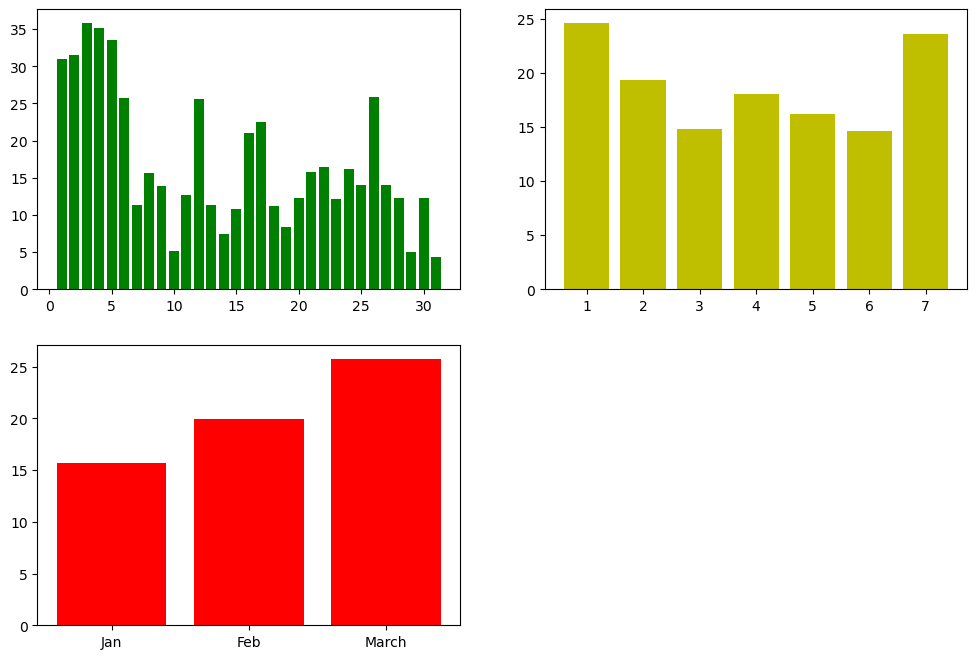

In [211]:
delay_day = flights.aggregate([
    {'$group': {'_id':'$DAY', 'avgDelay': {'$avg':{'$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}}},
    {'$project': {'_id':0,'DAY':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'avgDelay':1}}
])

delay_day_df = pd.DataFrame(delay_day)

delay_week = flights.aggregate([
    {'$group': {'_id':'$DAY_OF_WEEK', 'avgDelay': {'$avg':{'$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}}},
    {'$project': {'_id':0,'DAY_OF_WEEK':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'avgDelay':1}}
])

delay_week_df = pd.DataFrame(delay_week)

delay_month = flights.aggregate([
    {'$group': {'_id':'$MONTH', 'avgDelay': {'$avg':{'$add': ['$ARRIVAL_DELAY','$DEPARTURE_DELAY']}}}},
    {'$project': {'_id':0,'MONTH':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'avgDelay':1}}
])

delay_month_df = pd.DataFrame(delay_month)

plt.figure(figsize = (12,8))
plt.subplot(2, 2, 1)
plt.bar(delay_day_df['DAY'], delay_day_df['avgDelay'], color='g')
plt.subplot(2, 2, 2)
plt.bar(delay_week_df['DAY_OF_WEEK'], delay_week_df['avgDelay'], color='y')
plt.subplot(2, 2, 3) 
plt.bar(["Jan", "Feb", "March"], delay_month_df['avgDelay'], color='r')
plt.show()

- less delay is found in January
- less delay is also found in 10th or 31st of the month(considering all months)
- 3rd or 6th week has least departure and arrival delay